# Análise das propostas de licitações de João Pessoa e Campina Grande

    * Ranking de quantas licitações ganharam
    * Ranking de quantas licitações perderam
    * Ranking de quanto faturaram em licitações (soma do valor das propostas vencedoras)
    * Ranking de quanto perderam em licitações (soma do valor das propostas perdedoras)
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lic = pd.read_csv("propostas_licitacao.txt", sep="|", dtype={'cod_unidade_gestora': str,'numero_licitacao': str,'cod_tipo_licitacao': int,
                                                   'qtd_ofertada': int,'unidade_gestora': str, 'tipo_licitacao': str, 
                                                   'cpf_cnpj': str,'nome_proponente': str, 'situacao_proposta': str})
jur = pd.read_csv("jurisdicionado.csv", dtype={'codigo_sagres': str})

In [3]:
lic_mun = pd.merge(lic, jur, left_on="unidade_gestora", right_on="nome", how="left").dropna()
lic_mun

,cod_unidade_gestora,unidade_gestora,numero_licitacao,cod_tipo_licitacao,tipo_licitacao,cpf_cnpj,nome_proponente,qtd_ofertada,valor_ofertado,situacao_proposta,...,poder,tipojurisdicionado_fk,localidade_fk,nome,codigo_sagres,previdenciario,municipio_importacao,tramita_id,cancelled,esfera
0,101126,Câmara Municipal de Nazarezinho,000022009,8,Inexigível,00020509197434,CLAUDIO CESAR GADELHA RODRIGUES,1,13200.00,Vencedora,...,2.0,3.0,1274.0,Câmara Municipal de Nazarezinho,101126,False,Nazarezinho,146.0,False,1.0
1,101126,Câmara Municipal de Nazarezinho,000022010,8,Inexigível,00020509197434,CLAUDIO CESAR GADELHA RODRIGUES,1,14400.00,Vencedora,...,2.0,3.0,1274.0,Câmara Municipal de Nazarezinho,101126,False,Nazarezinho,146.0,False,1.0
2,101126,Câmara Municipal de Nazarezinho,000022011,8,Inexigível,00020509197434,CLAUDIO CESAR GADELHA RODRIGUES,1,18000.00,Vencedora,...,2.0,3.0,1274.0,Câmara Municipal de Nazarezinho,101126,False,Nazarezinho,146.0,False,1.0
3,101126,Câmara Municipal de Nazarezinho,000012010,8,Inexigível,00088564355434,ERISVALDO GOMES DE MELO,1,15600.00,Perdedora,...,2.0,3.0,1274.0,Câmara Municipal de Nazarezinho,101126,False,Nazarezinho,146.0,False,1.0
4,101127,Câmara Municipal de Nova Floresta,000022014,8,Inexigível,00005439371435,CLEIDSON FERNANDES SILVA,1,24000.00,Vencedora,...,2.0,3.0,1373.0,Câmara Municipal de Nova Floresta,101127,False,Nova Floresta,147.0,False,1.0
5,101127,Câmara Municipal de Nova Floresta,000022015,8,Inexigível,00005439371435,CLEIDSON FERNANDES SILVA,1,20000.00,Vencedora,...,2.0,3.0,1373.0,Câmara Municipal de Nova Floresta,101127,False,Nova Floresta,147.0,False,1.0
6,101127,Câmara Municipal de Nova Floresta,000022016,8,Inexigível,00005439371435,CLEIDSON FERNANDES SILVA,1,24000.00,Vencedora,...,2.0,3.0,1373.0,Câmara Municipal de Nova Floresta,101127,False,Nova Floresta,147.0,False,1.0
7,101127,Câmara Municipal de Nova Floresta,000022013,8,Inexigível,00005439371435,CLEIDSON FERNANDES SILVA,1,18000.00,Vencedora,...,2.0,3.0,1373.0,Câmara Municipal de Nova Floresta,101127,False,Nova Floresta,147.0,False,1.0
8,101129,Câmara Municipal de Nova Palmeira,000012008,3,Convite,11988276000146,PEDRO DE ALMEIDA SANTOS,1,23800.00,Perdedora,...,2.0,3.0,1334.0,Câmara Municipal de Nova Palmeira,101129,False,Nova Palmeira,149.0,False,1.0
12,101133,Câmara Municipal de Parari,000012015,7,Dispensa por outros motivos,00005082852400,MAURICIO DE QUEIROZ AIRES,1,4300.00,Vencedora,...,2.0,3.0,1347.0,Câmara Municipal de Parari,101133,False,Parari,153.0,False,1.0


In [4]:
vencedoras = lic_mun['nome_proponente'].groupby(lic['situacao_proposta']).get_group('Vencedora')
perdedoras = lic_mun['nome_proponente'].groupby(lic['situacao_proposta']).get_group('Perdedora')

Text(0.5, 0, 'Quantidade de licitações')

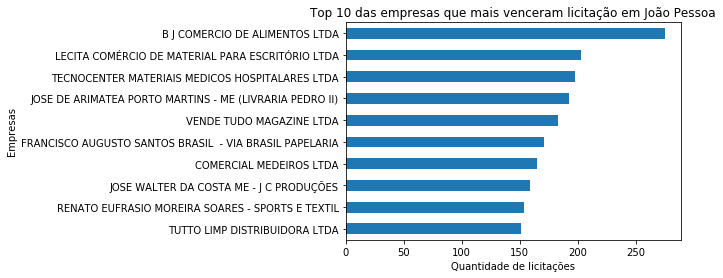

In [5]:
jpvit = vencedoras.groupby(lic_mun['municipio_importacao']).get_group('João Pessoa')
jpv = jpvit.value_counts()[:10]
jpv.plot(kind='barh', x='nome_proponente').invert_yaxis()
plt.title("Top 10 das empresas que mais venceram licitação em João Pessoa")
plt.ylabel('Empresas')
plt.xlabel('Quantidade de licitações')

In [6]:
jpv

B J COMERCIO DE ALIMENTOS LTDA                             275
LECITA COMÉRCIO DE MATERIAL PARA ESCRITÓRIO LTDA           203
TECNOCENTER MATERIAIS MEDICOS HOSPITALARES LTDA            198
JOSE DE ARIMATEA PORTO MARTINS - ME (LIVRARIA PEDRO II)    193
VENDE TUDO MAGAZINE LTDA                                   183
FRANCISCO AUGUSTO SANTOS BRASIL  - VIA BRASIL PAPELARIA    171
COMERCIAL MEDEIROS LTDA                                    165
JOSE WALTER DA COSTA ME - J C PRODUÇÕES                    159
RENATO EUFRASIO MOREIRA SOARES - SPORTS E TEXTIL           154
TUTTO LIMP DISTRIBUIDORA LTDA                              151
Name: nome_proponente, dtype: int64

Text(0.5, 0, 'Quantidade de licitações')

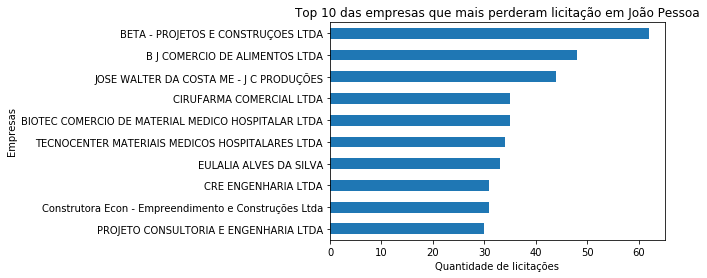

In [7]:
jpperd = perdedoras.groupby(lic_mun['municipio_importacao']).get_group('João Pessoa')
jpp = jpperd.value_counts()[:10]
jpp.plot(kind='barh', x='nome_proponente').invert_yaxis()
plt.title("Top 10 das empresas que mais perderam licitação em João Pessoa")
plt.ylabel('Empresas')
plt.xlabel('Quantidade de licitações')

In [8]:
jpp

BETA - PROJETOS E CONSTRUÇOES LTDA                      62
B J COMERCIO DE ALIMENTOS LTDA                          48
JOSE WALTER DA COSTA ME - J C PRODUÇÕES                 44
CIRUFARMA COMERCIAL LTDA                                35
BIOTEC COMERCIO DE MATERIAL MEDICO HOSPITALAR LTDA      35
TECNOCENTER MATERIAIS MEDICOS HOSPITALARES LTDA         34
EULALIA ALVES DA SILVA                                  33
CRE ENGENHARIA LTDA                                     31
Construtora Econ - Empreendimento e Construções Ltda    31
PROJETO CONSULTORIA E ENGENHARIA LTDA                   30
Name: nome_proponente, dtype: int64

Text(0.5, 0, 'Quantidade de licitações')

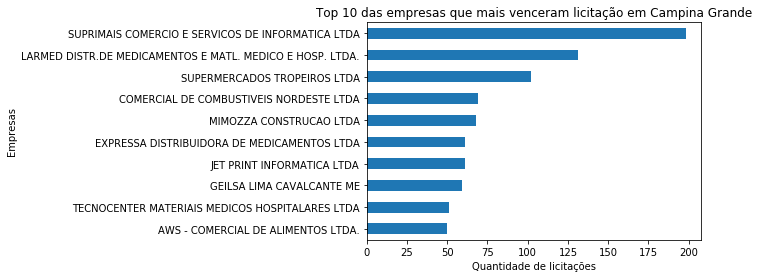

In [9]:
cgvit = vencedoras.groupby(lic_mun['municipio_importacao']).get_group('Campina Grande')
cgv = cgvit.value_counts()[:10]
cgv.plot(kind='barh', x='nome_proponente').invert_yaxis()
plt.title("Top 10 das empresas que mais venceram licitação em Campina Grande")
plt.ylabel('Empresas')
plt.xlabel('Quantidade de licitações')

In [10]:
cgv

SUPRIMAIS COMERCIO E SERVICOS DE INFORMATICA LTDA            198
LARMED DISTR.DE MEDICAMENTOS E MATL. MEDICO E HOSP. LTDA.    131
SUPERMERCADOS TROPEIROS LTDA                                 102
COMERCIAL DE COMBUSTIVEIS NORDESTE LTDA                       69
MIMOZZA CONSTRUCAO LTDA                                       68
EXPRESSA DISTRIBUIDORA DE MEDICAMENTOS LTDA                   61
JET PRINT INFORMATICA LTDA                                    61
GEILSA LIMA CAVALCANTE ME                                     59
TECNOCENTER MATERIAIS MEDICOS HOSPITALARES LTDA               51
AWS - COMERCIAL DE ALIMENTOS LTDA.                            50
Name: nome_proponente, dtype: int64

Text(0.5, 0, 'Quantidade de licitações')

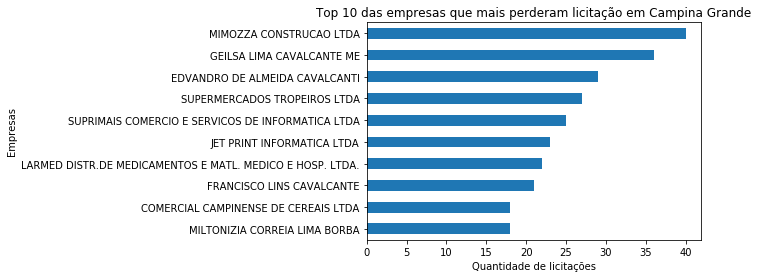

In [11]:
cgperd = perdedoras.groupby(lic_mun['municipio_importacao']).get_group('Campina Grande')
cgp = cgperd.value_counts()[:10]
cgp.plot(kind='barh', x='nome_proponente').invert_yaxis()
plt.title("Top 10 das empresas que mais perderam licitação em Campina Grande")
plt.ylabel('Empresas')
plt.xlabel('Quantidade de licitações')

In [12]:
cgp

MIMOZZA CONSTRUCAO LTDA                                      40
GEILSA LIMA CAVALCANTE ME                                    36
EDVANDRO DE ALMEIDA CAVALCANTI                               29
SUPERMERCADOS TROPEIROS LTDA                                 27
SUPRIMAIS COMERCIO E SERVICOS DE INFORMATICA LTDA            25
JET PRINT INFORMATICA LTDA                                   23
LARMED DISTR.DE MEDICAMENTOS E MATL. MEDICO E HOSP. LTDA.    22
FRANCISCO LINS CAVALCANTE                                    21
COMERCIAL CAMPINENSE DE CEREAIS LTDA                         18
MILTONIZIA CORREIA LIMA BORBA                                18
Name: nome_proponente, dtype: int64

Text(0.5, 0, 'Quanto faturaram')

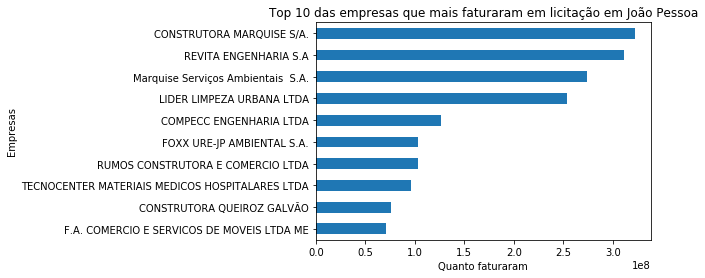

In [13]:
mais_faturajp = lic_mun[['nome_proponente','valor_ofertado','situacao_proposta']].groupby(lic_mun['municipio_importacao']).get_group('João Pessoa')
maisfatjp_vencedoras = mais_faturajp[mais_faturajp['situacao_proposta'].str.contains("Vencedora")]
maisfatjp = maisfatjp_vencedoras.groupby('nome_proponente')['valor_ofertado'].sum()
mfjp = maisfatjp.nlargest(10)
mfjp.plot(kind='barh', x='nome_proponente').invert_yaxis()
plt.title("Top 10 das empresas que mais faturaram em licitação em João Pessoa")
plt.ylabel('Empresas')
plt.xlabel('Quanto faturaram')

In [14]:
mfjp

nome_proponente
CONSTRUTORA MARQUISE S/A.                          3.219815e+08
REVITA ENGENHARIA S.A                              3.114633e+08
Marquise Serviços Ambientais  S.A.                 2.740373e+08
LIDER LIMPEZA URBANA LTDA                          2.539406e+08
COMPECC ENGENHARIA LTDA                            1.263911e+08
FOXX URE-JP AMBIENTAL S.A.                         1.030200e+08
RUMOS CONSTRUTORA E COMERCIO LTDA                  1.030200e+08
TECNOCENTER MATERIAIS MEDICOS HOSPITALARES LTDA    9.639897e+07
CONSTRUTORA QUEIROZ GALVÃO                         7.561582e+07
F.A. COMERCIO E SERVICOS DE MOVEIS LTDA ME         7.041721e+07
Name: valor_ofertado, dtype: float64

Text(0.5, 0, 'Quanto faturaram')

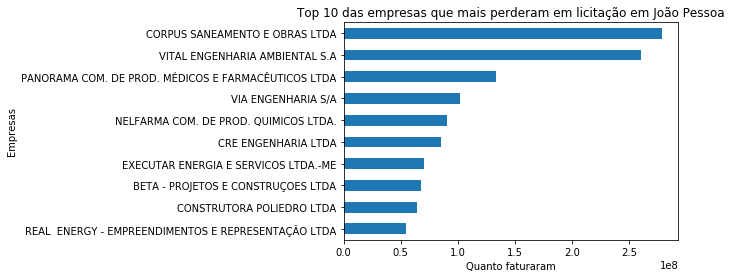

In [15]:
mais_perdejp = lic_mun[['nome_proponente','valor_ofertado','situacao_proposta']].groupby(lic_mun['municipio_importacao']).get_group('João Pessoa')
maisperjp_perdedoras = mais_perdejp[mais_perdejp['situacao_proposta'].str.contains("Perdedora")]
maisperjp = maisperjp_perdedoras.groupby('nome_proponente')['valor_ofertado'].sum()
mpjp = maisperjp.nlargest(10)
mpjp.plot(kind='barh', x='nome_proponente').invert_yaxis()
plt.title("Top 10 das empresas que mais perderam em licitação em João Pessoa")
plt.ylabel('Empresas')
plt.xlabel('Quanto faturaram')

In [16]:
mpjp

nome_proponente
CORPUS SANEAMENTO E OBRAS LTDA                         2.791103e+08
VITAL ENGENHARIA AMBIENTAL S.A                         2.600057e+08
PANORAMA COM. DE PROD. MÉDICOS E FARMACÊUTICOS LTDA    1.334190e+08
VIA ENGENHARIA S/A                                     1.021764e+08
NELFARMA COM. DE PROD. QUIMICOS LTDA.                  9.079656e+07
CRE ENGENHARIA LTDA                                    8.569347e+07
EXECUTAR ENERGIA E SERVICOS LTDA.-ME                   7.032400e+07
BETA - PROJETOS E CONSTRUÇOES LTDA                     6.735020e+07
CONSTRUTORA POLIEDRO LTDA                              6.423172e+07
REAL  ENERGY - EMPREENDIMENTOS E REPRESENTAÇÃO LTDA    5.432729e+07
Name: valor_ofertado, dtype: float64

Text(0.5, 0, 'Quanto faturaram')

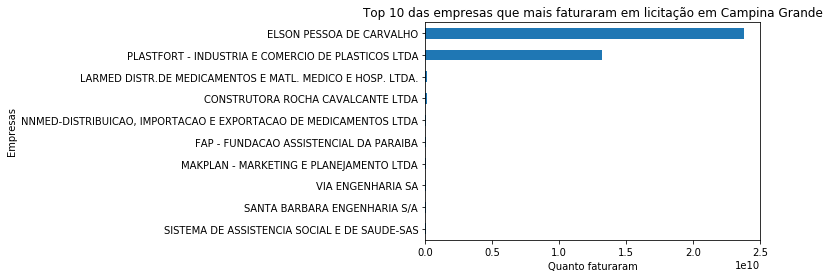

In [17]:
mais_faturacg = lic_mun[['nome_proponente','valor_ofertado','situacao_proposta']].groupby(lic_mun['municipio_importacao']).get_group('Campina Grande')
maisfatcg_vencedoras = mais_faturacg[mais_faturacg['situacao_proposta'].str.contains("Vencedora")]
maisfatcg = maisfatcg_vencedoras.groupby('nome_proponente')['valor_ofertado'].sum()
mfcg = maisfatcg.nlargest(10)
mfcg.plot(kind='barh', x='nome_proponente').invert_yaxis()
plt.title("Top 10 das empresas que mais faturaram em licitação em Campina Grande")
plt.ylabel('Empresas')
plt.xlabel('Quanto faturaram')

In [18]:
mfcg

nome_proponente
ELSON PESSOA DE CARVALHO                                            2.378368e+10
PLASTFORT - INDUSTRIA E COMERCIO DE PLASTICOS LTDA                  1.320094e+10
LARMED DISTR.DE MEDICAMENTOS E MATL. MEDICO E HOSP. LTDA.           1.548497e+08
CONSTRUTORA ROCHA CAVALCANTE LTDA                                   1.344814e+08
NNMED-DISTRIBUICAO, IMPORTACAO E EXPORTACAO DE MEDICAMENTOS LTDA    8.672777e+07
FAP - FUNDACAO ASSISTENCIAL DA PARAIBA                              8.443128e+07
MAKPLAN - MARKETING E PLANEJAMENTO LTDA                             7.530000e+07
VIA ENGENHARIA SA                                                   6.586071e+07
SANTA BARBARA ENGENHARIA S/A                                        6.576562e+07
SISTEMA DE ASSISTENCIA SOCIAL E DE SAUDE-SAS                        6.415101e+07
Name: valor_ofertado, dtype: float64

Text(0.5, 0, 'Quanto faturaram')

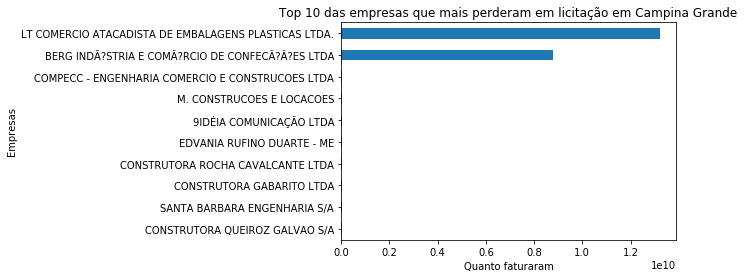

In [19]:
mais_perdecg = lic_mun[['nome_proponente','valor_ofertado','situacao_proposta']].groupby(lic_mun['municipio_importacao']).get_group('Campina Grande')
maispercg_perdedoras = mais_perdecg[mais_perdecg['situacao_proposta'].str.contains("Perdedora")]
maispercg = maispercg_perdedoras.groupby('nome_proponente')['valor_ofertado'].sum()
mpcg = maispercg.nlargest(10)
mpcg.plot(kind='barh', x='nome_proponente').invert_yaxis()
plt.title("Top 10 das empresas que mais perderam em licitação em Campina Grande")
plt.ylabel('Empresas')
plt.xlabel('Quanto faturaram')

In [20]:
mpcg

nome_proponente
LT COMERCIO ATACADISTA DE EMBALAGENS PLASTICAS LTDA.    1.322400e+10
BERG INDÃ?STRIA E COMÃ?RCIO DE CONFECÃ?Ã?ES LTDA        8.794554e+09
COMPECC - ENGENHARIA COMERCIO E CONSTRUCOES LTDA        4.234313e+07
M. CONSTRUCOES E LOCACOES                               3.724517e+07
9IDÉIA COMUNICAÇÃO LTDA                                 3.280000e+07
EDVANIA RUFINO DUARTE - ME                              2.580148e+07
CONSTRUTORA ROCHA CAVALCANTE LTDA                       2.357946e+07
CONSTRUTORA GABARITO LTDA                               2.103299e+07
SANTA BARBARA ENGENHARIA S/A                            2.085615e+07
CONSTRUTORA QUEIROZ GALVAO S/A                          2.080000e+07
Name: valor_ofertado, dtype: float64